<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M0.532 · Pattern Recognition</p>
<p style="margin: 0; text-align:right;">Computational Engineering and Mathematics Master</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Computers, Multimedia and Telecommunications Department</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

## Face Detection

In this notebook, we will see two different implementations of face detectors. The **first** implementation is based on an effective object detection method proposed by Paul Viola and Michael Jones in their paper , "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001, by using Haar feature-based cascade classifiers. The **second** implementation is RetinaFace, a deep learning based cutting-edge facial detector for Python coming with facial landmarks proposed in 2019.






### Haar feature-based cascade classifiers

For the first implementation of a face detector in this notebook we will adapt the tutorial from OpenCV that can be found in the following link: https://docs.opencv.org/4.x/db/d28/tutorial_cascade_classifier.html

Along this tutorial we will learn how to use the CasCade Classifier class from OpenCV to detect faces in an image.



We first mount Google Drive to have access to an image that wil be used as an example for face detection.

In [ ]:
from google.colab import drive
 
drive.mount('/content/drive')

Mounted at /content/drive


Here we have the path to our image in Google Drive.

In [ ]:
img_path = '/content/drive/My Drive/Docència/Reconeixement de Patrons/Notebooks/Object Detection/Images/people.jpg'

We will use two pre-trained classifiers that are available in OpenCV to be used for inference on new test images. On the one hand, we have a classifier which is able to detect the faces (face_cascade). On the other hand, we have a classifier which is able to detect the eyes (eyes_cascade). Given an image, first we convert it to a gray-scale image and then we apply the face detector by calling its function detectMultiScale. Then, for each region of the image detected as face, we apply the eyes detector in the same way. We finally visualize the image with the faces and eyes detected.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

#face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
#eyes_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_alt.xml')
eyes_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

frame = cv.imread(img_path) 
frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
frame_gray = cv.equalizeHist(frame_gray)
faces = face_cascade.detectMultiScale(frame_gray)
for (x,y,w,h) in faces:
    center = (x + w//2, y + h//2)
    frame = cv.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
    faceROI = frame_gray[y:y+h,x:x+w]
    #-- In each face, detect eyes
    eyes = eyes_cascade.detectMultiScale(faceROI)
    for (x2,y2,w2,h2) in eyes:
        eye_center = (x + x2 + w2//2, y + y2 + h2//2)
        radius = int(round((w2 + h2)*0.25))
        frame = cv.circle(frame, eye_center, radius, (255, 0, 0 ), 4)
cv2_imshow(frame)

Output hidden; open in https://colab.research.google.com to view.

### RetinaFace

The second implementation is RetinaFace, a deep learning based cutting-edge facial detector for Python coming with facial landmarks proposed in 2019.

We will rely on [this repo](https://github.com/serengil/retinaface), which is a Pytorch implementation heavily inspired from the study of [Stanislas Bertrand](https://github.com/StanislasBertrand/RetinaFace-tf2), an implementation in tensorflow of RetinaFace. This Pytorch reimplementation source code is simplified and it is transformed to pip compatible but the main structure of the reference model and its pre-trained weights are same. The original code is mainly based on mxnet.

We first install retina-face with pip.

In [ ]:
pip install retina-face

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14273 sha256=cd7f5d7b430917ef99732b21342315186ec0ffccea46cb1dfcdeabf88057953a
  Stored in directory: /root/.cache/pip/wheels/8c/17/ff/58721d1fabdb87c21a0529948cf39e2be9af90ddbe4ad65944
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


Once installed, we just need to import the RetinaFace module and called the detect_faces function over any image we want to use the face detector.

In [ ]:
from retinaface import RetinaFace
img_path = '/content/drive/My Drive/Docència/Reconeixement de Patrons/Notebooks/Object Detection/Images/people.jpg'
resp = RetinaFace.detect_faces(img_path)

If we visualize the variable resp, we can see that is is a dictionary, where each entry is one of the faces detected with information about the facial area (bounding box), the localization of some landmarks (mouth_left, mouth_right, nose, left_eye and right_eye) and the classification score.

In [ ]:
resp

{'face_1': {'facial_area': [928, 417, 1067, 598],
  'landmarks': {'left_eye': [1019.49207, 497.58374],
   'mouth_left': [1022.46423, 550.9061],
   'mouth_right': [961.75885, 549.849],
   'nose': [981.3629, 536.84717],
   'right_eye': [955.9584, 495.58746]},
  'score': 0.9996445178985596},
 'face_10': {'facial_area': [1802, 348, 1940, 528],
  'landmarks': {'left_eye': [1911.2129, 421.26773],
   'mouth_left': [1904.7786, 476.52774],
   'mouth_right': [1841.517, 471.97968],
   'nose': [1880.6079, 450.94522],
   'right_eye': [1847.0594, 416.20642]},
  'score': 0.9992056488990784},
 'face_11': {'facial_area': [149, 370, 299, 583],
  'landmarks': {'left_eye': [275.58322, 456.32703],
   'mouth_left': [271.41977, 521.8214],
   'mouth_right': [200.07095, 521.2571],
   'nose': [251.33826, 492.2537],
   'right_eye': [204.88855, 455.9717]},
  'score': 0.9992030262947083},
 'face_12': {'facial_area': [706, 353, 836, 533],
  'landmarks': {'left_eye': [803.2638, 413.79388],
   'mouth_left': [795.9654

Finally, we implement a visualization function to draw the bounding boxes of the faces detected and the localization of the landmarks on the test image.

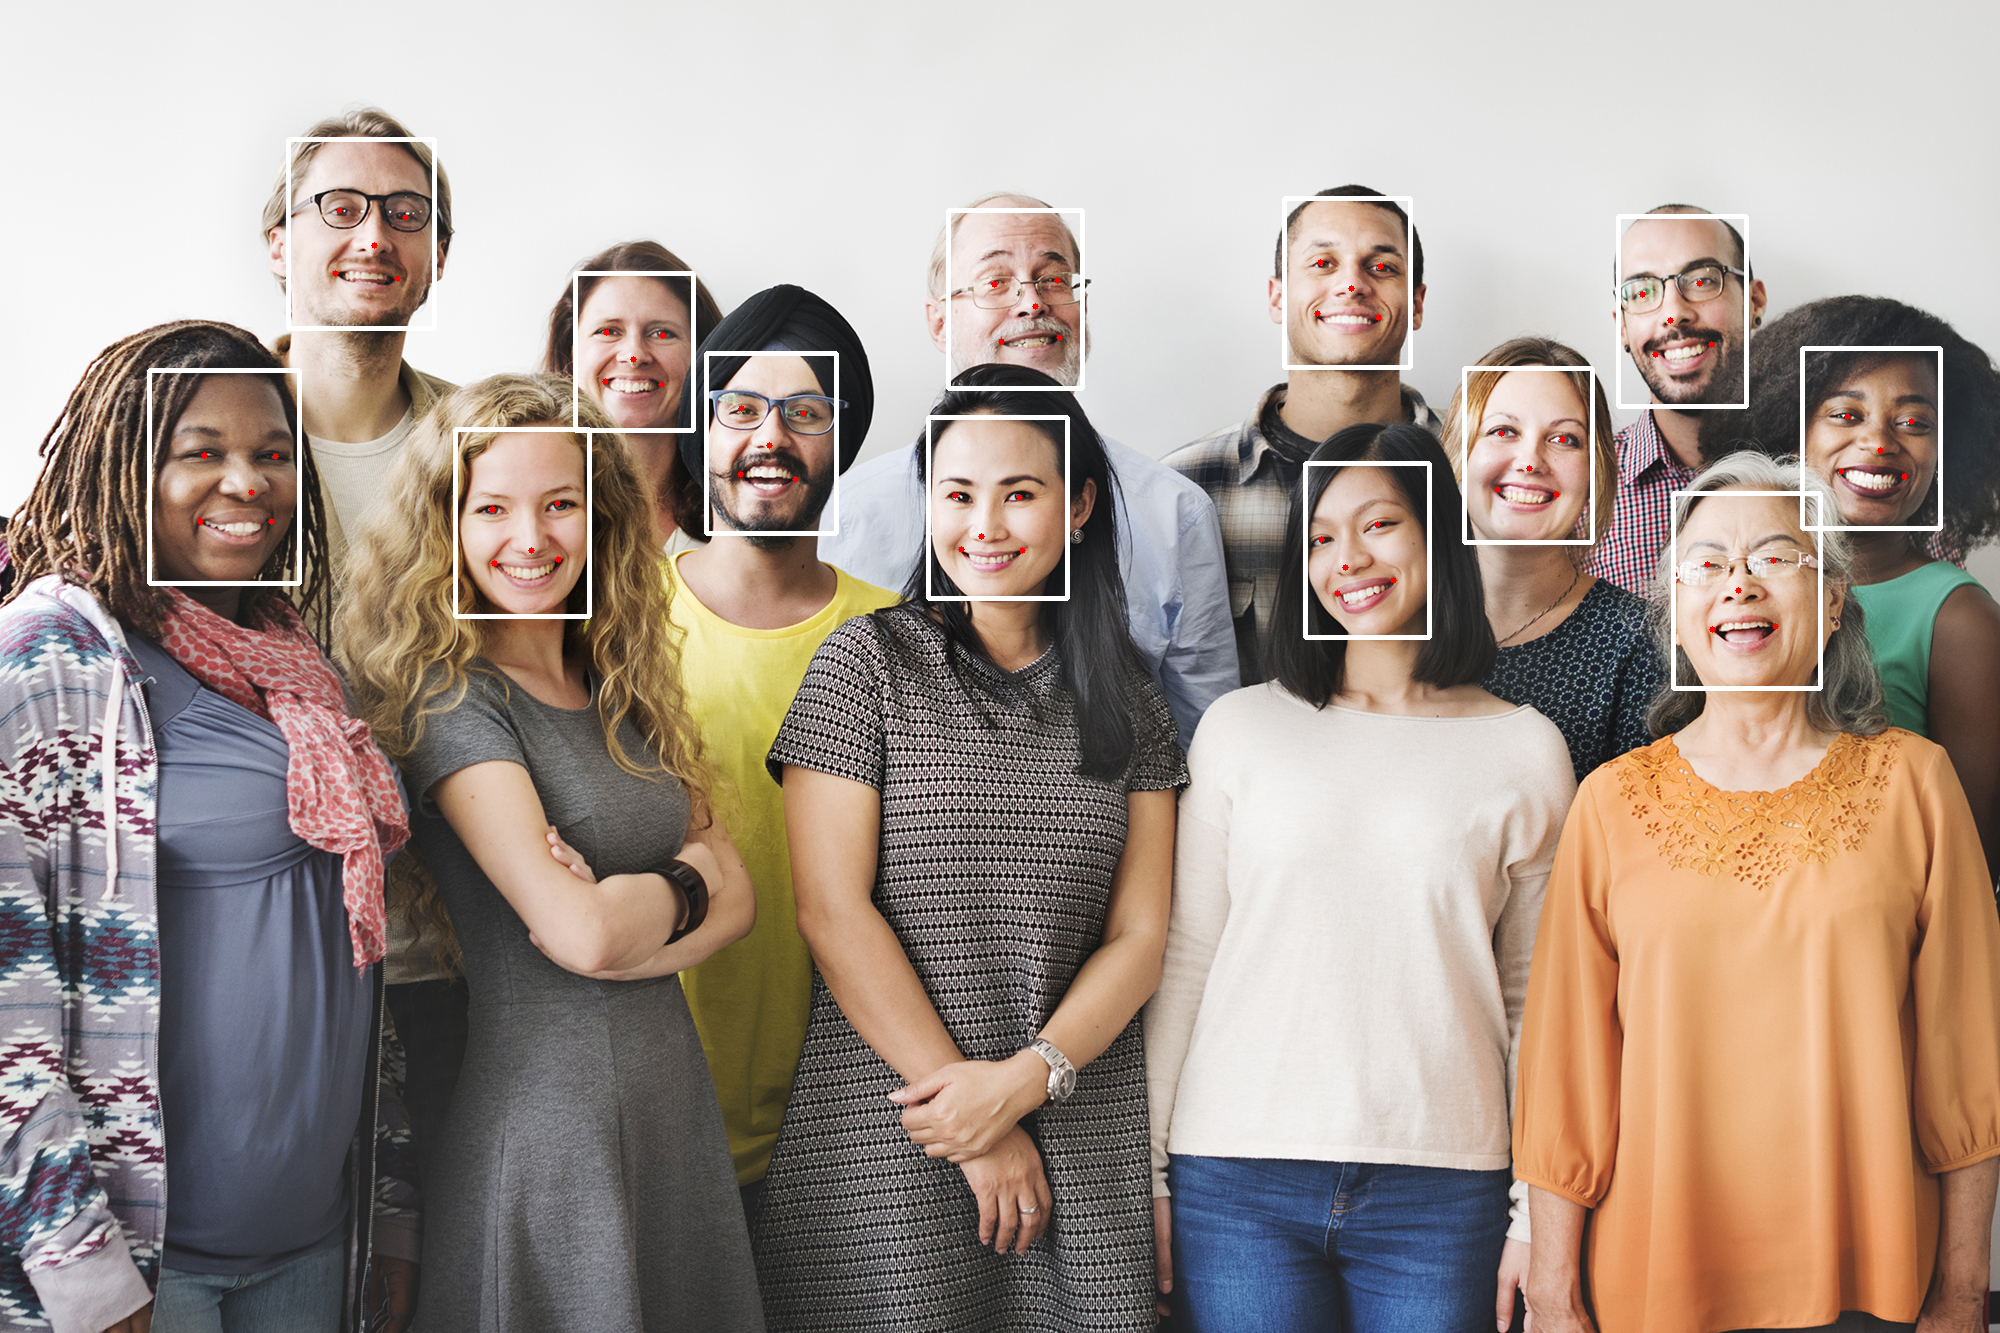

In [ ]:
import cv2
from google.colab.patches import cv2_imshow


img = cv2.imread(img_path)

def int_tuple(t):
    return tuple(int(x) for x in t)

for key in resp:
    identity = resp[key]

    landmarks = identity["landmarks"]
    diameter = 3
    cv2.circle(img, int_tuple(landmarks["left_eye"]), diameter, (0, 0, 255), -1)
    cv2.circle(img, int_tuple(landmarks["right_eye"]), diameter, (0, 0, 255), -1)
    cv2.circle(img, int_tuple(landmarks["nose"]), diameter, (0, 0, 255), -1)
    cv2.circle(img, int_tuple(landmarks["mouth_left"]), diameter, (0, 0, 255), -1)
    cv2.circle(img, int_tuple(landmarks["mouth_right"]), diameter, (0, 0, 255), -1)

    facial_area = identity["facial_area"]
    cv2.rectangle(img, (facial_area[2], facial_area[3]), (facial_area[0], facial_area[1]), (255, 255, 255), 3)

cv2_imshow(img)
